<a href="https://colab.research.google.com/github/lonj22803/Preprocesamientod_de_textos/blob/main/Taller1_Preprocesamiento_de_textos_y_exploracion_y_clasificacion_de_documentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Taller 1: Preprocesamiento de textos, exploracion y clasificación de documentos.**
Técnicas de Procesamiento de Lenguaje Natural\
Maestria en Ingenieria Electrica

---
Universidad Tecnologica de Pereira
Profesor: Julian David Echeverry Correa\
**Entregado por:**\
Juan Jose Londoño Cardenas y Juan Camilo Chavarro Acosta

---

### Librerias para el desarollo del taller y funciones.

Aqui estaran todas la librerias utilizadas para el desarrollo del taller, ademas de eso se crearon funciones para facilitar las tareas de lematizacion ya que algunos modulos solo lo hacen en ingles, graficas, etc.


In [2]:
#Librerias
!pip install wordcloud
!pip install numpy matplotlib scikit-learn
!pip install sklearn
!pip install matplotlib
!pip install python-Levenshtein
!pip install -U spacy
!python -m spacy download es_core_news_sm
!pip install pyspellchecker==0.7.2
import requests
import string
import matplotlib.pyplot as plt
import random
import os
import math
import re
import nltk
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spellchecker
import Levenshtein
import glob
from wordcloud import WordCloud
from functools import reduce
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.metrics import BigramAssocMeasures
from nltk import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder
from collections import Counter
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

#Funciones
nlp = spacy.load('es_core_news_sm')

#Funcion creada para lemmatizar, ya que la funcion por defecto de nlt no lemmatiza en español
def lematizar_palabras(palabras):
    lemas = []
    for palabra in palabras:
        doc = nlp(palabra)
        lema = doc[0].lemma_
        lemas.append(lema)
    return lemas


#Se crea una funcion para eleminar la puntuacion de frases o de texto, luego de ser separadas.
puntuacion = '—-.,;:¡!¿?""'
def quitar_puntuacion(frase):
    # Crea una tabla de traducción para eliminar los caracteres de puntuación
    tabla = str.maketrans('', '', puntuacion)
    # Aplica la traducción a la frase y retorna la frase sin los caracteres de puntuación
    return frase.translate(tabla)


#Se crea una funcion para graficar el numero de palabras
def graficar_top_palabras(palabras):
    # Obtener el recuento de cada palabra en la lista
    recuento_palabras = Counter(palabras)

    # Obtener las 20 palabras más comunes y sus recuentos
    top_palabras = recuento_palabras.most_common(20)

    # Extraer las palabras y los recuentos en listas separadas
    palabras, recuentos = zip(*top_palabras)

    # Configurar la figura y los ejes del gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(palabras, recuentos)
    plt.xlabel('Palabras')
    plt.ylabel('Recuento')
    plt.title('Top 20 de palabras más repetidas')

    # Ajustar el espaciado entre las etiquetas del eje x para evitar superposiciones
    plt.xticks(rotation=90)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Cargar texto

Con el fin de facilitar la revisión, se cargarán los textos directamente desde Github, esto evitará problemas con los archivos, accesos a drive u otra complicación que no permita la compilacion del codigo por parte del uso de los textos.

In [3]:
# URL del archivo de texto en GitHub
url = 'https://inclusa.github.io/txt/principito.txt'
url2 = 'https://raw.githubusercontent.com/JorgeDuenasLerin/diccionario-espanol-txt/master/0_palabras_todas.txt'

# Realizar la solicitud HTTP
response = requests.get(url)

# Verificar el estado de la respuesta
if response.status_code == 200:
    # Guardar el contenido en un archivo local
    with open('principito.txt', 'w') as file:
        file.write(response.text)
        print("Archivo llamado principito.txt guardado exitosamente.")
else:
    print("No se pudo acceder al archivo en GitHub.")

# Verificar el estado de la respuesta
if response.status_code == 200:
    # Guardar el contenido en un archivo local
    with open('diccionario.txt', 'w') as file:
        file.write(response.text)
        print("Archivo llamado diccionario.txt guardado exitosamente.")
else:
    print("No se pudo acceder al archivo en GitHub.")



Archivo llamado principito.txt guardado exitosamente.
Archivo llamado diccionario.txt guardado exitosamente.


In [4]:
#Cargamos el texto
mitexto=open("principito.txt", "r")
contenido= mitexto.read()
mitexto.close()
#print(contenido)
print(type(contenido))

<class 'str'>


### Punto 1

Normalice el formato de sus textos (pase todos los textos a letras minusculas).

In [5]:
punto_uno= contenido.lower()
print(punto_uno[:110])
type(punto_uno)

antoine de s aint - exupéry

el principito

antoine de saint-exupéry - el principito
texto de dominio público.


str

### Punto 2

Segmente sus documentos a nivel de frase (considere separadores de frase puntos, comas, puntos y comas).Guarde ese resultado en un archivo frases.txt.

In [6]:
#Seleccionamos un patron de separacion para las frases, despues eliminamos esos caracteres para que las frases queden limpias

patron_separacion = r'(?<=[.,;:¿?¡!-"])\s+' #En el patron se seleccionan perguntas, excalamaciones y guiones de interlocusiones.

frases = re.split(patron_separacion, contenido.lower())
#Se creo una funcion que se llamo "quitar_puntuacion", la cual le quita la puntuacion a las frases y se usara posterior de separar en frases.
frases_terminadas = []
for frase in frases:
    frase_sin_puntuacion = quitar_puntuacion(frase)
    if frase_sin_puntuacion.strip():
      frases_terminadas.append(frase_sin_puntuacion)

print(frases_terminadas)

#Procedemos a guardar el resultado en un txt

archivo_salida = open("frases.txt", "w")
for frase_terminada in frases_terminadas:
    archivo_salida.write(frase_terminada + "\n")
archivo_salida.close()


['antoine de s aint  exupéry\n\nel principito\n\nantoine de saintexupéry  el principito\ntexto de dominio público', '\n\neste texto digital es de dominio público en ecuador por cumplirse más de 50 años de la muerte de su\nautor', 'sin embargo no todas las leyes de copyright son iguales en los diferentes países del mundo', 'infórmese de la situación de su país antes de la distribución pública de este texto', 'todas las formas de redistribución digital o de impresión quedan autorizadas en aquellos países en el\ncual este texto es de dominio público siempre que en las mismas se incluya el siguiente aviso', '“la biblioteca virtual de la ueb”\nhttp//wwwuebeduec\nwebmaster@uebeduec\necuador  noviembre 2003\n\nel principito\na', 'de saint  exupéry\n\na leon werth', 'pido perdón a los niños por haber dedicado este libro a una persona mayor', 'tengo una seria\nexcusa', 'esta pe rsona mayor es el mejor amigo que tengo en el mundo', 'tengo otra excusa', 'esta persona\nmayor es capaz de entenderlo

**Comentario**


Aunque se usó un patrón de separación teniendo en cuenta una jerarquía, los resultados son aceptables en la división de las frases, exceptuando algunos casos puntuales donde se pueden encontrar palabras sueltas, incluso letras o simplemente bigramas (estos son más aceptables). Esto se debe a que la diferenciación de las frases se realiza de forma mecánica, teniendo en cuenta la expresión regular '(?<=[.,;:¿?¡!-"])\s+', es decir, se considera la separación según estos patrones, no teniendo en cuenta el significado de la frase.


### Punto 3
Segmente sus documentos a nivel de palabra, elimine signos de puntuacion y caracteres no alfabeticos. Calcule el numero de tokens (running words) que hay en sus textos y el numero de palabras distintas(vocabulario).

In [7]:
# Eliminar números, signos de puntuación y caracteres no alfabéticos.
contenido_sin_numeros = re.sub(r"\d+", "", contenido.lower())
contenido_limpio = re.sub(r"[^\w\s]", "", contenido_sin_numeros)
palabras = contenido_limpio.split()
# Calcular el número de tokens (running words)
numero_tokens1 = int(len(palabras))
# Calcular el número de palabras distintas (vocabulario)
vocabulario = set(palabras)
numero_palabras_distintas1 = int(len(vocabulario))
print(type(palabras))
print(palabras)
print("Número de tokens:", numero_tokens1)
print("Número de palabras distintas:", numero_palabras_distintas1)

<class 'list'>
['antoine', 'de', 's', 'aint', 'exupéry', 'el', 'principito', 'antoine', 'de', 'saintexupéry', 'el', 'principito', 'texto', 'de', 'dominio', 'público', 'este', 'texto', 'digital', 'es', 'de', 'dominio', 'público', 'en', 'ecuador', 'por', 'cumplirse', 'más', 'de', 'años', 'de', 'la', 'muerte', 'de', 'su', 'autor', 'sin', 'embargo', 'no', 'todas', 'las', 'leyes', 'de', 'copyright', 'son', 'iguales', 'en', 'los', 'diferentes', 'países', 'del', 'mundo', 'infórmese', 'de', 'la', 'situación', 'de', 'su', 'país', 'antes', 'de', 'la', 'distribución', 'pública', 'de', 'este', 'texto', 'todas', 'las', 'formas', 'de', 'redistribución', 'digital', 'o', 'de', 'impresión', 'quedan', 'autorizadas', 'en', 'aquellos', 'países', 'en', 'el', 'cual', 'este', 'texto', 'es', 'de', 'dominio', 'público', 'siempre', 'que', 'en', 'las', 'mismas', 'se', 'incluya', 'el', 'siguiente', 'aviso', 'la', 'biblioteca', 'virtual', 'de', 'la', 'ueb', 'httpwwwuebeduec', 'webmasteruebeduec', 'ecuador', 'novie

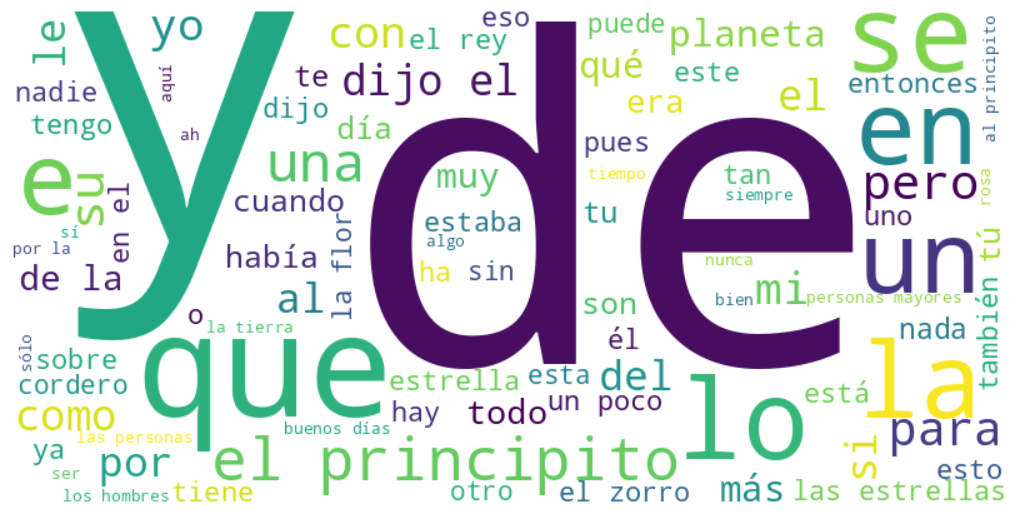

In [8]:
# Convertir la lista de palabras en un texto
texto = ' '.join(palabras)
# Crear el objeto WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=90).generate(texto)
# Configurar el estilo de la figura
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# Mostrar la figura sin bordes
plt.tight_layout(pad=0)
plt.show()

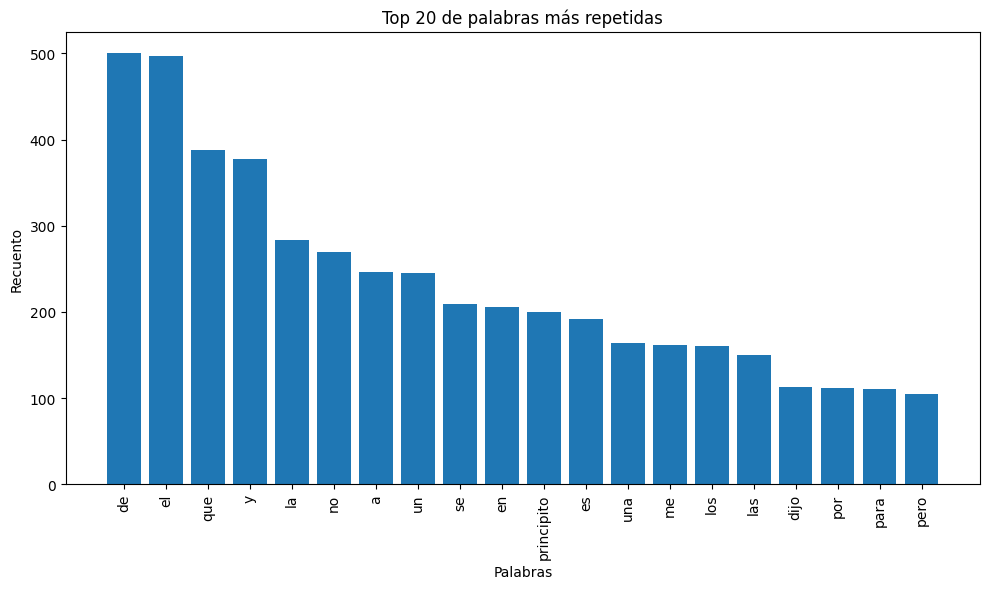

In [9]:
graficar_top_palabras(palabras)

**Comentario**

Se realizaron las tareas de eliminación de números utilizando la expresión regular r"\d+". Además, se llevó a cabo la conversión de todas las letras a minúsculas. Posteriormente, se utilizó la expresión regular r"[^\w\s]" con el fin de obtener solo las palabras independientes en una lista.

Al verificar los resultados obtenidos, se obtuvo lo siguiente:

Número de tokens: 13688
Número de palabras distintas: 2733

Esto significa que a lo largo del corpus existen 2733 palabras distintas, mientras que se tienen 13688 tokens, los cuales pueden ser una palabra, un carácter o una subpalabra. En la mayoría de los casos, estos tokens representan palabras completas o caracteres individuales. Es importante tener en cuenta que en algunos casos se pueden utilizar letras como "a", "o", "e", "y", etc., como conectores. Por lo tanto, de las 2733 palabras presentes en el vocabulario, se utilizan 13688 veces.

Dado que no se realizó la eliminación de stopwords (palabras vacías o sin significado), es probable que estén presentes en la nube de palabras. Estas stopwords son elementos utilizados para unir palabras con significado, como artículos, comparadores, conectores, etc. Aunque no tienen tanta relevancia en el texto evaluado, se puede observar en la gráfica de repetición que los conectores y artículos son más frecuentes.

### Punto 4

Seleccione un listado de posibles stop-words y elimine esas palabras de sus textos. Recalcule el numero de tokens y el vocabulario. Compare estos numeros con los obtenidos en el paso anterior. Puede utilizar los listados de stop-words predefinidas que vienen con muchas librerias (p.ej. NLTK trae su propio listado de stop-words, Orange tambien tiene su propio listado).

In [10]:
# Eliminar stop words en español
#Seleccionamos los stpwords en español.
stopwords_spanish = set(stopwords.words("spanish"))
palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_spanish]

# Calcular el número de tokens (running words)
numero_tokens = int(len(palabras_filtradas))
# Calcular el número de palabras distintas (vocabulario)
vocabulario = set(palabras_filtradas)
numero_palabras_distintas = int(len(vocabulario))

print(palabras_filtradas)
print("Número de tokens:", numero_tokens)
print("Número de palabras distintas:", numero_palabras_distintas)

['antoine', 's', 'aint', 'exupéry', 'principito', 'antoine', 'saintexupéry', 'principito', 'texto', 'dominio', 'público', 'texto', 'digital', 'dominio', 'público', 'ecuador', 'cumplirse', 'años', 'muerte', 'autor', 'embargo', 'todas', 'leyes', 'copyright', 'iguales', 'diferentes', 'países', 'mundo', 'infórmese', 'situación', 'país', 'distribución', 'pública', 'texto', 'todas', 'formas', 'redistribución', 'digital', 'impresión', 'quedan', 'autorizadas', 'aquellos', 'países', 'texto', 'dominio', 'público', 'siempre', 'mismas', 'incluya', 'siguiente', 'aviso', 'biblioteca', 'virtual', 'ueb', 'httpwwwuebeduec', 'webmasteruebeduec', 'ecuador', 'noviembre', 'principito', 'saint', 'exupéry', 'leon', 'werth', 'pido', 'perdón', 'niños', 'haber', 'dedicado', 'libro', 'persona', 'mayor', 'seria', 'excusa', 'pe', 'rsona', 'mayor', 'mejor', 'amigo', 'mundo', 'excusa', 'persona', 'mayor', 'capaz', 'entenderlo', 'libros', 'niños', 'tercera', 'excusa', 'persona', 'mayor', 'vive', 'francia', 'pasa', 'h

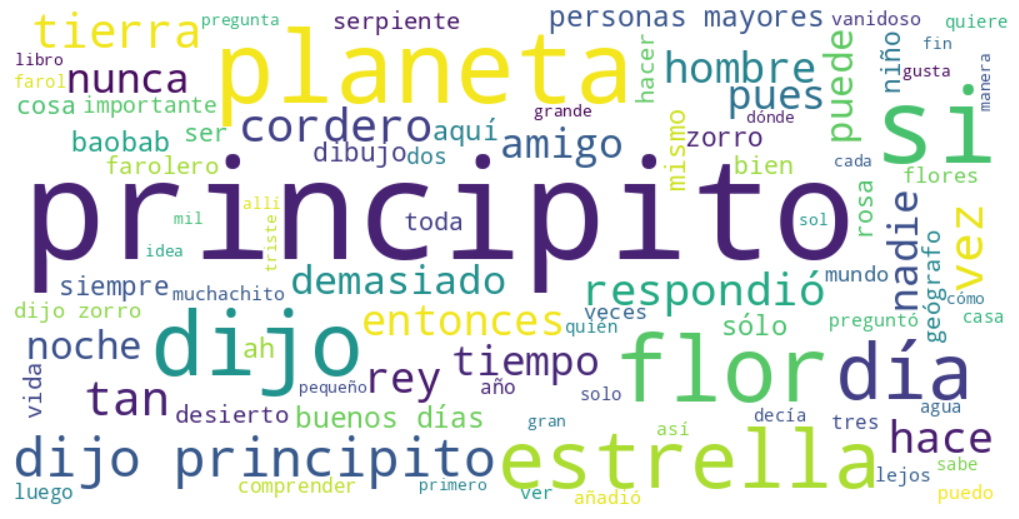

In [11]:
# Convertir la lista de palabras en un texto
texto = ' '.join(palabras_filtradas)
# Crear el objeto WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=90).generate(texto)

# Configurar el estilo de la figura
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Mostrar la figura sin bordes
plt.tight_layout(pad=0)

# Mostrar la nube de palabras
plt.show()

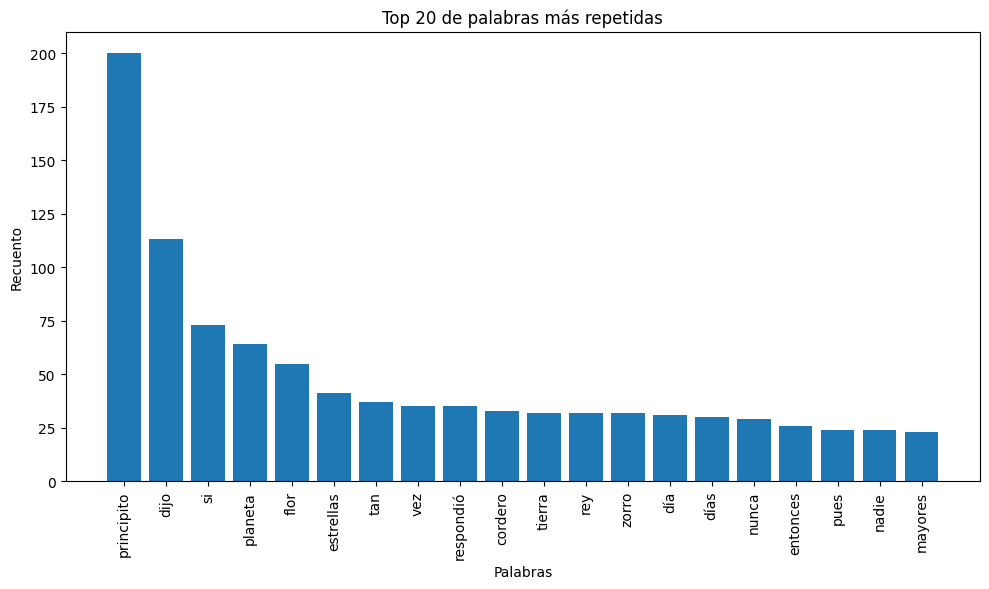

In [12]:
graficar_top_palabras(palabras_filtradas)

**Comentario**

Resultados:

Número de tokens: 6697
Número de palabras distintas: 2565


Al eliminar las stopwords, la lista de tokens se reduce significativamente, lo que confirma la teoría de que estas palabras sin significado son las que más se repiten en el texto. Además, el vocabulario se redujo cerca de 200 palabras, lo que facilita el análisis del texto a nivel de palabras. Teniendo en cuenta el libro que estamos evaluando, es cierto que la palabra "Principito" es la que más se repite.

La eliminación de stopwords permite eliminar palabras comunes que no aportan un significado importante al texto y, por lo tanto, reducir el ruido y enfocarse en las palabras clave y relevantes. Al hacerlo, se simplifica la tarea de análisis y se obtienen resultados más precisos. En este caso particular, se observa que la palabra "Principito" es una de las más relevantes en el libro.

Es importante destacar que la eliminación de stopwords puede variar dependiendo del contexto y del objetivo del análisis. Algunas palabras que pueden considerarse stopwords en un contexto pueden ser significativas en otro, por lo que se debe tener cuidado al aplicar este tipo de técnicas de procesamiento de texto.

### Punto 5
Realice tareas de stemming y lematizado en sus textos. De nuevo, recalcule el numero de tokens y el vocabulario. Compare estos numeros con los obtenidos en los pasos anteriores. Recuerde que puede usar para las tareas de stemming y lematizado de los textos cualquiera de las herramientas que hemos visto y comentado en el curso, por ejemplo: Orange, Stanza, NLTK, CORE NLP, etc.

In [13]:
# Lematización en español
palabras_lem= lematizar_palabras(palabras_filtradas)

# Calcular el número de tokens (running words) después de stemming
numero_tokens_lem = int(len(palabras_lem))
# Calcular el número de palabras distintas (vocabulario) después de stemming
vocabulario_lem = set(palabras_lem)
numero_palabras_distintas_lem = int(len(vocabulario_lem))
print(palabras_lem)
print("Número de tokens después de lematizacion:", numero_tokens_lem)
print("Número de palabras distintas después de lematizacion:", numero_palabras_distintas_lem)

['antoine', 's', 'aint', 'exupéry', 'principito', 'antoine', 'saintexupéry', 'principito', 'texto', 'dominio', 'público', 'texto', 'digital', 'dominio', 'público', 'ecuador', 'cumplir él', 'año', 'muerte', 'autor', 'embargo', 'todo', 'ley', 'copyright', 'igual', 'diferente', 'país', 'mundo', 'infórmese', 'situación', 'país', 'distribución', 'público', 'texto', 'todo', 'forma', 'redistribución', 'digital', 'impresión', 'quedar', 'autorizado', 'aquel', 'país', 'texto', 'dominio', 'público', 'siempre', 'mismo', 'incluyo', 'siguiente', 'aviso', 'biblioteca', 'virtual', 'ueb', 'httpwwwuebeduec', 'webmasteruebeduec', 'ecuador', 'noviembre', 'principito', 'saint', 'exupéry', 'leon', 'werth', 'pedir', 'perdón', 'niño', 'haber', 'dedicado', 'libro', 'persona', 'mayor', 'serio', 'excusa', 'pe', 'rsonar', 'mayor', 'mejor', 'amigo', 'mundo', 'excusa', 'persona', 'mayor', 'capaz', 'entender él', 'libro', 'niño', 'tercero', 'excusa', 'persona', 'mayor', 'vivir', 'francia', 'pasar', 'hambre', 'frío',

In [14]:
#Hagamos Stemming por independiente y miremos que resultados arroja
# Stemming en español
stemmer = SnowballStemmer("spanish")
palabras_stem = [stemmer.stem(palabra) for palabra in palabras_filtradas]
# Calcular el número de tokens (running words) después de stemming
numero_tokens_stem = int(len(palabras_stem))
# Calcular el número de palabras distintas (vocabulario) después de stemming
vocabulario_stem = set(palabras_stem)
numero_palabras_distintas_stem = int(len(vocabulario_stem))
print(palabras_stem)
print("Número de tokens después de stemming:", numero_tokens_stem)
print("Número de palabras distintas después de stemming:", numero_palabras_distintas_stem)

['antoin', 's', 'aint', 'exupery', 'principit', 'antoin', 'saintexupery', 'principit', 'text', 'domini', 'public', 'text', 'digital', 'domini', 'public', 'ecuador', 'cumpl', 'años', 'muert', 'autor', 'embarg', 'tod', 'ley', 'copyright', 'igual', 'diferent', 'pais', 'mund', 'informes', 'situacion', 'pais', 'distribu', 'public', 'text', 'tod', 'form', 'redistribu', 'digital', 'impresion', 'qued', 'autoriz', 'aquell', 'pais', 'text', 'domini', 'public', 'siempr', 'mism', 'inclu', 'siguient', 'avis', 'bibliotec', 'virtual', 'ueb', 'httpwwwuebeduec', 'webmasteruebeduec', 'ecuador', 'noviembr', 'principit', 'saint', 'exupery', 'leon', 'werth', 'pid', 'perdon', 'niñ', 'hab', 'dedic', 'libr', 'person', 'mayor', 'seri', 'excus', 'pe', 'rson', 'mayor', 'mejor', 'amig', 'mund', 'excus', 'person', 'mayor', 'capaz', 'entend', 'libr', 'niñ', 'tercer', 'excus', 'person', 'mayor', 'viv', 'franci', 'pas', 'hambr', 'fri', 'verdader', 'necesit', 'consuel', 'si', 'tod', 'excus', 'bast', 'bien', 'pued', 'd

In [15]:
#Hagamos Stemming despues de haber hecho Lemmatizacion.
# Stemming en español
stemmer = SnowballStemmer("spanish")
palabras_stem_lem = [stemmer.stem(palabra) for palabra in palabras_lem]
# Calcular el número de tokens (running words) después de stemming
numero_tokens_stem_lem = int(len(palabras_stem_lem))
# Calcular el número de palabras distintas (vocabulario) después de stemming
vocabulario_stem_lem = set(palabras_stem_lem)
numero_palabras_distintas_stem_lem = int(len(vocabulario_stem_lem))
print(palabras_stem_lem)
print("Número de tokens después de lematizado y stemming:", numero_tokens_stem_lem)
print("Número de palabras distintas después de lematizado y stemming:", numero_palabras_distintas_stem_lem)

['antoin', 's', 'aint', 'exupery', 'principit', 'antoin', 'saintexupery', 'principit', 'text', 'domini', 'public', 'text', 'digital', 'domini', 'public', 'ecuador', 'cumplir el', 'año', 'muert', 'autor', 'embarg', 'tod', 'ley', 'copyright', 'igual', 'diferent', 'pais', 'mund', 'informes', 'situacion', 'pais', 'distribu', 'public', 'text', 'tod', 'form', 'redistribu', 'digital', 'impresion', 'qued', 'autoriz', 'aquel', 'pais', 'text', 'domini', 'public', 'siempr', 'mism', 'inclu', 'siguient', 'avis', 'bibliotec', 'virtual', 'ueb', 'httpwwwuebeduec', 'webmasteruebeduec', 'ecuador', 'noviembr', 'principit', 'saint', 'exupery', 'leon', 'werth', 'ped', 'perdon', 'niñ', 'hab', 'dedic', 'libr', 'person', 'mayor', 'seri', 'excus', 'pe', 'rson', 'mayor', 'mejor', 'amig', 'mund', 'excus', 'person', 'mayor', 'capaz', 'entender el', 'libr', 'niñ', 'tercer', 'excus', 'person', 'mayor', 'viv', 'franci', 'pas', 'hambr', 'fri', 'verdader', 'necesit', 'consuel', 'si', 'tod', 'excus', 'bastas', 'bien', 

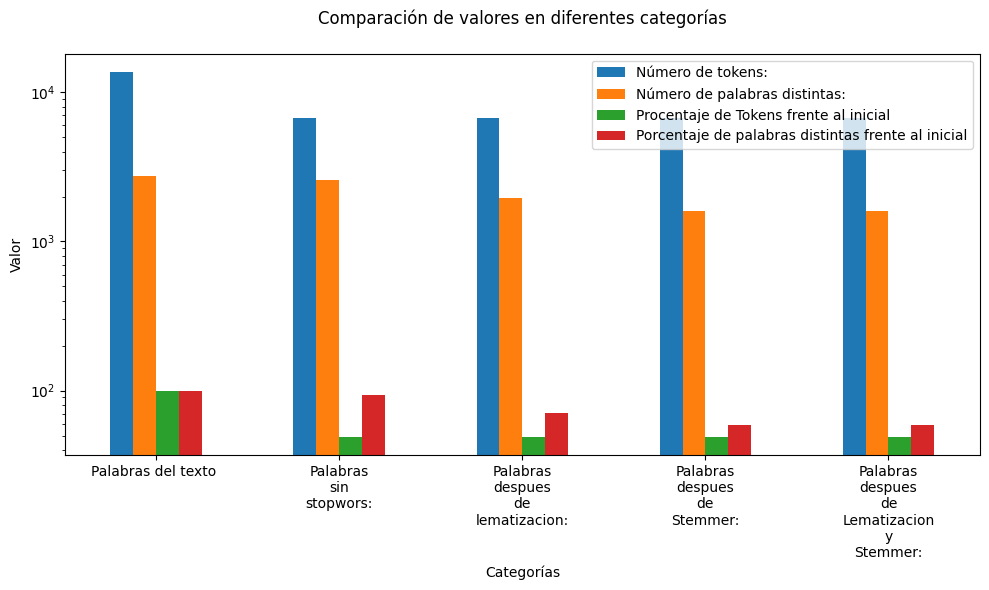

In [16]:
d= (np.array([[numero_tokens1, numero_palabras_distintas1,((numero_tokens1/numero_tokens1)*100), ((numero_palabras_distintas1/numero_palabras_distintas1)*100)], [numero_tokens,numero_palabras_distintas,((numero_tokens/numero_tokens1)*100),((numero_palabras_distintas/numero_palabras_distintas1)*100)],[numero_tokens_lem,numero_palabras_distintas_lem,((numero_tokens_lem/numero_tokens1)*100),((numero_palabras_distintas_lem/numero_palabras_distintas1)*100)], [numero_tokens_stem,numero_palabras_distintas_stem,((numero_tokens_stem/numero_tokens1)*100),((numero_palabras_distintas_stem/numero_palabras_distintas1)*100)], [numero_tokens_stem_lem,numero_palabras_distintas_stem_lem,((numero_tokens_stem_lem/numero_tokens1)*100),((numero_palabras_distintas_stem_lem/numero_palabras_distintas1)*100)]]))
df = pd.DataFrame(data=d,
                  columns=["Número de tokens:","Número de palabras distintas:","Procentaje de Tokens frente al inicial","Porcentaje de palabras distintas frente al inicial"],
                  index=['Palabras del texto ','Palabras sin stopwors:', 'Palabras despues de lematizacion:','Palabras despues de Stemmer:', 'Palabras despues de Lematizacion y Stemmer:'])
#print(df)
# Crear el gráfico de barras con una escala logarítmica en el eje y
ax = df.plot(kind='bar', logy=True, figsize=(10, 6))
# Configurar etiquetas, título y leyenda
plt.xlabel('Categorías')
plt.ylabel('Valor')
plt.title('Comparación de valores en diferentes categorías\n')
plt.legend()
# Ajustar las etiquetas del eje x
labels = [text.get_text() for text in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)  # Rotación inicial
# Ajustar las etiquetas a tres líneas
max_label_length = max(len(label) for label in labels)
if max_label_length > 20:
    # Si las etiquetas son muy largas, ajustar a tres líneas
    ax.set_xticklabels([label.replace(' ', '\n') if len(label) > 20 else label for label in labels], rotation=0)
# Ajustar el espaciado entre las etiquetas del eje x para evitar superposiciones
plt.tight_layout()
# Mostrar el gráfico
plt.show()

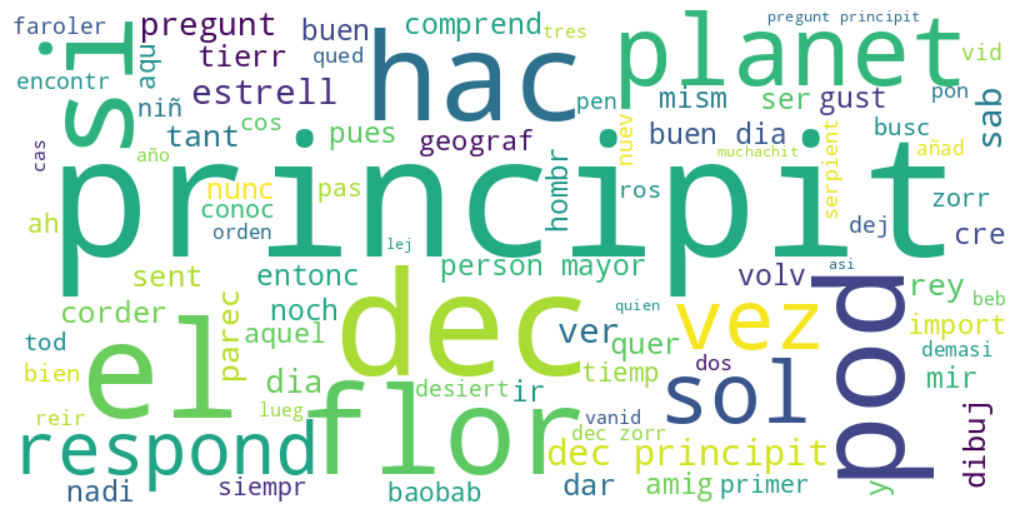

In [17]:
# Convertir la lista de palabras en un texto
texto = ' '.join(palabras_stem_lem)
# Crear el objeto WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=90).generate(texto)
# Configurar el estilo de la figura
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# Mostrar la figura sin bordes
plt.tight_layout(pad=0)
# Mostrar la nube de palabras
plt.show()

In [18]:
data=d.T
df2 = pd.DataFrame(data=data,
                  index=["Número de tokens:","Número de palabras distintas:","Procentaje de Tokens frente al inicial","Porcentaje de palabras distintas frente al inicial"],
                  columns=['Palabras del texto ','Palabras sin stopwors:', 'Palabras despues de lematizacion:','Palabras despues de Stemmer:', 'Palabras despues de Lematizacion y Stemmer:'])
#print(df2)

**Comentario**

Si observamos el gráfico en el que se comparan las palabras con stopwords, sin stopwords y una combinación de lematización y stemming, podemos notar cómo la combinación de ambas técnicas, primero lematizar y luego aplicar stemming, minimiza en gran medida el vocabulario. La combinacion de ambas da mejores resultados en lugar de realizar cada tarea de forma independiente, recordemos que la lematización reduce una palabra a su forma canónica o lema, que representa su concepto principal o base léxica. Por otro lado, el stemming es una técnica más sencilla que elimina los sufijos y prefijos de una palabra para llegar a su raíz. Por lo tanto, tiene sentido que la combinación de ambas técnicas reduzca considerablemente el vocabulario con tokens fijos.

Sin embargo, es importante tener en cuenta que el resultado final de lematizar y aplicar stemming es solo la raíz de las palabras, lo cual puede hacer que se pierda parte de su significado original, como se puede observar en la nuve de palabras.


### Punto 6

Modifique todas las frases del archivo frases.txt para que tengan una marca de inicio de frase < s > y una marca de fin de frase < /s > . Esto se hace con el fin de que se puedan identificar, en los modelos de lenguaje, las palabras mas frecuentes con las que se inician frases y las mas frecuentes al final de las mismas. A partir de estos textos calcule los n-grams (hasta n= 3).

In [19]:
# Archivo final
archivo_final = 'frases_modificadas_final.txt'
# Abrir el archivo de texto original en modo lectura
with open('frases.txt', 'r') as file:
    # Leer todas las líneas del archivo y guardarlas en una lista
    lineas = file.readlines()
# Crear una nueva lista para almacenar las frases modificadas
frases_modificadas = []
# Iterar sobre cada línea del archivo
for linea in lineas:
    # Eliminar los espacios en blanco adicionales al principio y al final de la línea
    linea = linea.strip()
    # Verificar si la línea no está vacía
    if linea:
        # Modificar la línea agregando las marcas de inicio y fin de frase
        linea_modificada = "<s>" + linea + "</s>"
        # Agregar la línea modificada a la lista de frases modificadas
        frases_modificadas.append(linea_modificada)
# Escribir las frases modificadas en el nuevo archivo
with open(archivo_final, 'w') as file:
    for frase_modificada in frases_modificadas:
        file.write(frase_modificada + '\n')
print(f"Archivo final guardado como '{archivo_final}'.")
print(frases_modificadas)

Archivo final guardado como 'frases_modificadas_final.txt'.
['<s>antoine de s aint  exupéry</s>', '<s>el principito</s>', '<s>antoine de saintexupéry  el principito</s>', '<s>texto de dominio público</s>', '<s>este texto digital es de dominio público en ecuador por cumplirse más de 50 años de la muerte de su</s>', '<s>autor</s>', '<s>sin embargo no todas las leyes de copyright son iguales en los diferentes países del mundo</s>', '<s>infórmese de la situación de su país antes de la distribución pública de este texto</s>', '<s>todas las formas de redistribución digital o de impresión quedan autorizadas en aquellos países en el</s>', '<s>cual este texto es de dominio público siempre que en las mismas se incluya el siguiente aviso</s>', '<s>“la biblioteca virtual de la ueb”</s>', '<s>http//wwwuebeduec</s>', '<s>webmaster@uebeduec</s>', '<s>ecuador  noviembre 2003</s>', '<s>el principito</s>', '<s>a</s>', '<s>de saint  exupéry</s>', '<s>a leon werth</s>', '<s>pido perdón a los niños por hab

In [20]:
with open('frases_modificadas_final.txt', 'r') as file:
  text = file.read()
# Obtener las frases del texto
sentences = re.findall(r'<s>(.*?)</s>', text, flags=re.DOTALL)
# Tokenizar y procesar cada frase
all_unigrams = []
all_bigrams = []
all_trigrams = []
n1, n2, n3 = 1, 2, 3
for sentence in sentences:
    # Tokenizar la frase en palabras
    tokens = word_tokenize(sentence)
    # Calcular los unigramas, bigramas y trigramas de la frase
    unigrams = list(ngrams(tokens, n1))
    bigrams = list(ngrams(tokens, n2))
    trigrams = list(ngrams(tokens, n3))
    # Agregar los n-gramas de la frase a las listas globales
    all_unigrams.extend(unigrams)
    all_bigrams.extend(bigrams)
    all_trigrams.extend(trigrams)
# Imprimir los resultados
print(f"Unigramas:{len(all_unigrams)}")
print(all_unigrams)
print(f"\nBigramas:{len(all_bigrams)}")
print(all_bigrams)
print(f"\nTrigramas:{len(all_trigrams)}")
print(all_trigrams)

Unigramas:13758
[('antoine',), ('de',), ('s',), ('aint',), ('exupéry',), ('el',), ('principito',), ('antoine',), ('de',), ('saintexupéry',), ('el',), ('principito',), ('texto',), ('de',), ('dominio',), ('público',), ('este',), ('texto',), ('digital',), ('es',), ('de',), ('dominio',), ('público',), ('en',), ('ecuador',), ('por',), ('cumplirse',), ('más',), ('de',), ('50',), ('años',), ('de',), ('la',), ('muerte',), ('de',), ('su',), ('autor',), ('sin',), ('embargo',), ('no',), ('todas',), ('las',), ('leyes',), ('de',), ('copyright',), ('son',), ('iguales',), ('en',), ('los',), ('diferentes',), ('países',), ('del',), ('mundo',), ('infórmese',), ('de',), ('la',), ('situación',), ('de',), ('su',), ('país',), ('antes',), ('de',), ('la',), ('distribución',), ('pública',), ('de',), ('este',), ('texto',), ('todas',), ('las',), ('formas',), ('de',), ('redistribución',), ('digital',), ('o',), ('de',), ('impresión',), ('quedan',), ('autorizadas',), ('en',), ('aquellos',), ('países',), ('en',), ('

In [21]:
count = Counter(all_bigrams)
fdist = nltk.probability.FreqDist(all_bigrams)
count.most_common(30)

[(('el', 'principito'), 163),
 (('dijo', 'el'), 72),
 (('de', 'la'), 36),
 (('en', 'el'), 31),
 (('un', 'poco'), 28),
 (('a', 'la'), 26),
 (('las', 'estrellas'), 26),
 (('que', 'no'), 25),
 (('el', 'rey'), 24),
 (('el', 'zorro'), 24),
 (('lo', 'que'), 23),
 (('la', 'flor'), 22),
 (('que', 'se'), 21),
 (('de', 'un'), 21),
 (('y', 'el'), 21),
 (('buenos', 'días'), 21),
 (('personas', 'mayores'), 20),
 (('no', 'es'), 20),
 (('pero', 'no'), 19),
 (('al', 'principito'), 19),
 (('la', 'tierra'), 19),
 (('las', 'personas'), 18),
 (('es', 'muy'), 18),
 (('a', 'los'), 17),
 (('por', 'qué'), 17),
 (('que', 'me'), 17),
 (('y', 'no'), 17),
 (('de', 'los'), 17),
 (('por', 'la'), 17),
 (('de', 'una'), 17)]

In [22]:
count = Counter(all_trigrams)
fdist = nltk.probability.FreqDist(all_trigrams)
count.most_common(30)

[(('dijo', 'el', 'principito'), 37),
 (('las', 'personas', 'mayores'), 17),
 (('dijo', 'el', 'zorro'), 15),
 (('el', 'principito', 'se'), 12),
 (('preguntó', 'el', 'principito'), 10),
 (('el', 'principito', 'no'), 9),
 (('y', 'el', 'principito'), 8),
 (('le', 'dijo', 'el'), 8),
 (('hombre', 'de', 'negocios'), 8),
 (('quinientos', 'millones', 'de'), 7),
 (('un', 'poco', 'de'), 6),
 (('puestas', 'de', 'sol'), 6),
 (('yo', 'soy', 'un'), 6),
 (('soy', 'un', 'hombre'), 6),
 (('todas', 'las', 'estrellas'), 6),
 (('dijo', 'el', 'rey'), 6),
 (('respondió', 'el', 'rey'), 6),
 (('le', 'respondió', 'el'), 6),
 (('el', 'principito', 'que'), 6),
 (('el', 'hombre', 'de'), 6),
 (('en', 'el', 'mundo'), 5),
 (('de', 'esta', 'manera'), 5),
 (('millas', 'de', 'distancia'), 5),
 (('píntame', 'un', 'cordero'), 5),
 (('pero', 'no', 'es'), 5),
 (('por', 'la', 'noche'), 5),
 (('el', 'planeta', 'del'), 5),
 (('que', 'el', 'principito'), 5),
 (('a', 'sí', 'mismo'), 5),
 (('habitado', 'por', 'un'), 5)]

**Comentario**

Es correcto tener en cuenta cómo se realizó el análisis de n-gramas. Una forma de hacerlo es convirtiendo todas las frases en una cadena de texto y luego analizando sus posibles combinaciones. Para que tenga más sentido, es que se realiza esta separación por frases. Si una frase termina con una palabra y otra frase comienza con otra palabra, no tiene sentido considerar un bigrama entre ellas, ya que no están en la misma frase, son frases separadas. Por esto el analisis que se llevo a cabo.

Dado que la palabra que más se repite es "Principito", tiene sentido que el bigrama que ocurre con mayor frecuencia y el trigrama también lo contengan. De esta manera, se obtuvieron los siguientes resultados:

*   Unigramas:13758
*   Bigramas:11102
*   Trigramas:8822

Cabe destacar que no se eliminaron stopwords con el fin de que estos n-gramas tuvieran mayor sentido gramatical.

### Punto 7
Empleando el metodo de informacion mutua y los bigramas obtenidos en el paso anterior, determine los pares de palabras que podrian ser colocaciones en sus textos.

In [23]:
bigram_counts = Counter(all_bigrams)
# Paso 2: Calcular frecuencias marginales de cada palabra
word_counts = Counter(word for bigram in all_bigrams for word in bigram)
# Paso 3: Calcular probabilidades conjuntas de cada bigrama
corpus_size = len(all_bigrams)
joint_probabilities = {bigram: count / corpus_size for bigram, count in bigram_counts.items()}
# Paso 4: Calcular probabilidades marginales de cada palabra
word_probabilities = {word: count / corpus_size for word, count in word_counts.items()}
# Paso 5: Calcular la información mutua para cada bigrama
information_mutuals = {bigram: math.log2(joint_probabilities[bigram] / (word_probabilities[bigram[0]] * word_probabilities[bigram[1]])) for bigram in bigram_counts}
# Paso 6: Ordenar bigramas por información mutua en orden descendente
sorted_bigrams = sorted(information_mutuals, key=information_mutuals.get, reverse=True)
# Mostrar los bigramas ordenados por su información mutua
#for bigram in sorted_bigrams:
#    print(bigram, information_mutuals[bigram])

In [24]:
# Contador para almacenar la cantidad de bigramas con información mutua mayor a 9
contador = 0
# Mostrar los bigramas con información mutua mayor a 9 y contar su cantidad
for bigram in sorted_bigrams:
    if information_mutuals[bigram] > 9:
        contador += 1
        print(bigram, information_mutuals[bigram])
print("Cantidad de bigramas con información mutua mayor a 9:", contador)

('articular', 'palabra') 13.438531977761583
('cuántos', 'hermanos') 13.438531977761583
('exclaman', 'entusiasmados') 13.438531977761583
('pobres', 'astucias') 13.438531977761583
('seguí', 'callado') 13.438531977761583
('ueb', '”') 12.438531977761583
('webmaster', '@') 12.438531977761583
('@', 'uebeduec') 12.438531977761583
('noviembre', '2003') 12.438531977761583
('pido', 'perdón') 12.438531977761583
('necesita', 'consuelo') 12.438531977761583
('historias', 'vividas') 12.438531977761583
('presa', 'entera') 12.438531977761583
('quedado', 'desilusionado') 12.438531977761583
('pilotear', 'aviones') 12.438531977761583
('imposible', 'desobedecer') 12.438531977761583
('grit', 'ó') 12.438531977761583
('congreso', 'internacional') 12.438531977761583
('juegos', 'prefiere') 12.438531977761583
('sabido', 'reconocerla') 12.438531977761583
('estados', 'unidos') 12.438531977761583
('mecí', 'diciéndole') 12.438531977761583
('apre', 'ndí') 12.438531977761583
('envoltura', 'verde') 12.438531977761583
(

**Comentario**

Se debe tener en cuenta que la información mutua es una medida utilizada para cuantificar la relación estadística entre dos términos o palabras en un corpus. En este caso, estamos trabajando solo con bigramas, y nuestro objetivo es analizar qué dos palabras ocurren juntas con más frecuencia de lo esperado. Si consideramos que las colocaciones son asociaciones léxicas recurrentes y significativas, con un mayor grado de frecuencia, podemos decir que estas colocaciones van más allá de las combinaciones de palabras que se esperarían por azar. Es decir, reflejan una relación léxica y tienen un significado específico con relación semántica, esto se puede notar al ver los bigramas obtenidos.

Por ejemplo, la colocación "articular palabra" podría estar asociada a situaciones de nerviosismo, la capacidad de expresarse verbalmente, momentos tensos, entre otras diferentes situaciones

### Punto 8
Implemente un generador de frases aleatorias. Utilice los n-grams generados en el ítem 6 y sus modelos de lenguaje (sus probabilidades). Disene una estrategia que le parezca adecuada, por ejemplo, podría determinar de forma aleatoria la palabra inicial de cada frase y completar desde ahi. Ademas considere diseñar estrategias de seleccion de n-grams para que el generador no caiga en bucles o ciclos cerrados.

In [25]:
#Revisemos la lista de las primeras palabras
with open('frases_modificadas_final.txt', 'r') as file:
    lineass = file.readlines()
# Crear una lista para almacenar las primeras palabras
primeras_palabras = []
# Recorrer cada línea del archivo
for linea in lineass:
    # Dividir la línea en palabras separadas por espacios
    palabras = linea.split()
    # Obtener la primera palabra (sin <s>)
    primera_palabra = palabras[0][3:].replace("<s>", "")
    # Agregar la primera palabra a la lista
    primeras_palabras.append(primera_palabra)
palabras_inicio_frase =list(set(primeras_palabras))
palabras_inicio_frase = [palabra for palabra in palabras_inicio_frase if not palabra.endswith('</s>')]
print(f"Palabras disponibles para inicio de frase: {len(palabras_inicio_frase)}")
print(palabras_inicio_frase)
palabra_aleatoria = random.choice(palabras_inicio_frase)
print(f"La palabra seleccionada es: {palabra_aleatoria}")

Palabras disponibles para inicio de frase: 575
['serás', 'ciertamente', 'porque', 'quiere', 'rocas', 'joven', 'ves', 'sentí', 'año', 'puede', 'llevaban', 'dibujé', 'mirar', 'hierbas', 'ah', 'tomen', 'poco', 'partir', 'crear', 'serio', 'debes', 'van', 'mañana', 'garrapateé', 'así', 'dónde', 'recordó', 'incluso', 'dirigió', 'un', 'fues', 'regularmente', 'poseo', 'encendían', 'si', 'desde', 'pensaba', 'algunas', 'daba', 'quiénes', 'cascabeles', 'súbitamente', 'sentía', 'sintió', 'cual', 'quien', 'ni', 'tartamudeaba', 'aún', 'electricidad', 'ninguna', 'necesito', 'estaba', 'arrastrar', 'quería', 'estaré', 'gracias', 'pero', 'golpea', 'soportar', 'retraso', 'elegía', 'formo', 'rugiendo', 'antes', '(pero', 'decidido', 'suavemente', 'tosería', 'crees', 'tienen', 'tú', 'iba', 'contestó', '“no', 'comprenderás', 'hizo', 'desapareciendo', 'también', 'soy', 'lentamente', 'siete', 'terribles…', 'ave', 'veintiocho', 'agotando', 'resiste', 'entonces', 'sabía', 'trata', 'dos', 'movía', 'cositas', 'res

In [26]:
def calcular_probabilidades(secuencias):
    """
    Calcula las probabilidades de las secuencias de palabras.

    Args:
        secuencias (list): Lista de tuplas que representan las secuencias de palabras.

    Returns:
        dict: Diccionario donde las claves son las secuencias de palabras y los valores son las probabilidades correspondientes.

    Raises:
        None

    """
    frecuencias = FreqDist(secuencias)
    total = len(secuencias)
    probabilidades = {}

    for secuencia in frecuencias:
        frecuencia = frecuencias[secuencia]
        probabilidad = frecuencia / total
        probabilidades[secuencia] = probabilidad

    return probabilidades

In [27]:
#Generador 1
def generar_frase(palabra, bigramas, trigramas, longitud_frase):
    """
    Genera una frase basada en bigramas y trigramas.
    Args:
        palabra (str): La primera palabra de la frase.
        bigramas (dict): Diccionario donde las claves son bigramas y los valores son las probabilidades correspondientes.
        trigramas (dict): Diccionario donde las claves son trigramas y los valores son las probabilidades correspondientes.
        longitud_frase (int): Longitud deseada de la frase generada.
    Returns:
        str: La frase generada.
    Raises:
        None
    """
    frase = [palabra]
    ultima_palabra = palabra

    for i in range(longitud_frase):
        # Filtrar bigramas y trigramas que coinciden con la última palabra
        bigramas_coincidentes = {bigrama: probabilidad for bigrama, probabilidad in bigramas.items() if bigrama[0] == palabra}
        trigramas_coincidentes = {trigrama: probabilidad for trigrama, probabilidad in trigramas.items() if trigrama[0] == palabra}

        # Elegir la siguiente palabra en función de las probabilidades
        siguiente_palabra = None

        if len(bigramas_coincidentes) > 0:
            siguiente_palabra = random.choices(list(bigramas_coincidentes.keys()), weights=list(bigramas_coincidentes.values()), k=1)[0][1]
        elif len(trigramas_coincidentes) > 0:
            siguiente_palabra = random.choices(list(trigramas_coincidentes.keys()), weights=list(trigramas_coincidentes.values()), k=1)[0][2]
        else:
            break

        # Agregar la siguiente palabra a la frase y actualizar la última palabra
        frase.append(siguiente_palabra)
        ultima_palabra = siguiente_palabra
        palabra = ultima_palabra

    # Asegurarse de que la frase tenga la longitud deseada y convertirla en una cadena
    frase = frase[:longitud_frase]
    frase_generada = ' '.join(frase)

    return frase_generada

In [28]:
# Cálculo de probabilidades para bigramas y trigramas
bigrams2 = calcular_probabilidades(all_bigrams)
trigrams2 = calcular_probabilidades(all_trigrams)
#print(bigrams2)
#print(trigrams2)

#Ejemplo
frase_generada = generar_frase(palabra_aleatoria, bigrams2, trigrams2, 9)
print(frase_generada)

manera tuve conocimiento al principito escaló hasta los faroleros


In [29]:
#Generador 2
def generar_frase(palabra, bigramas, trigramas, longitud_frase):
    """
    Genera una frase basada en bigramas y trigramas.
    Args:
        palabra (str): La primera palabra de la frase.
        bigramas (dict): Diccionario donde las claves son bigramas y los valores son las probabilidades correspondientes.
        trigramas (dict): Diccionario donde las claves son trigramas y los valores son las probabilidades correspondientes.
        longitud_frase (int): Longitud deseada de la frase generada.
    Returns:
        str: La frase generada.
    Raises:
        None
    """
    frase = [palabra]
    ultima_palabra = palabra

    for i in range(longitud_frase):
        # Filtrar bigramas y trigramas que coinciden con la última palabra
        bigramas_coincidentes = {bigrama: probabilidad for bigrama, probabilidad in bigramas.items() if bigrama[0] == palabra}
        trigramas_coincidentes = {trigrama: probabilidad for trigrama, probabilidad in trigramas.items() if trigrama[0] == palabra}

        # Elegir la siguiente palabra en función de las probabilidades
        siguiente_palabra = None

        if len(bigramas_coincidentes) > 0 and len(trigramas_coincidentes) > 0:
          palabra1 = random.choices(list(bigramas_coincidentes.keys()), weights=list(bigramas_coincidentes.values()), k=1)[0][1]
          palabra2 = random.choices(list(trigramas_coincidentes.keys()), weights=list(trigramas_coincidentes.values()), k=1)[0][2]
          siguiente_palabra=random.choice([palabra1, palabra2])
          # Agregar la siguiente palabra a la frase y actualizar la última palabra
          frase.append(siguiente_palabra)
          ultima_palabra = siguiente_palabra
          palabra = ultima_palabra
        elif len(bigramas_coincidentes) > 0:
            siguiente_palabra = random.choices(list(bigramas_coincidentes.keys()), weights=list(bigramas_coincidentes.values()), k=1)[0][1]
            # Agregar la siguiente palabra a la frase y actualizar la última palabra
            frase.append(siguiente_palabra)
            ultima_palabra = siguiente_palabra
            palabra = ultima_palabra
        elif len(trigramas_coincidentes) > 0:
            siguiente_palabra = random.choices(list(trigramas_coincidentes.keys()), weights=list(trigramas_coincidentes.values()), k=1)[0][2]
            # Agregar la siguiente palabra a la frase y actualizar la última palabra
            frase.append(siguiente_palabra)
            ultima_palabra = siguiente_palabra
            palabra = ultima_palabra
        else:
            break


    # Asegurarse de que la frase tenga la longitud deseada y convertirla en una cadena
    frase = frase[:longitud_frase]
    frase_generada = ' '.join(frase)

    return frase_generada

In [30]:
# Cálculo de probabilidades para bigramas y trigramas
bigrams2 = calcular_probabilidades(all_bigrams)
trigrams2 = calcular_probabilidades(all_trigrams)
#print(bigrams2)
#print(trigrams2)

#Ejemplo
frase_generada = generar_frase(palabra_aleatoria, bigrams2, trigrams2, 9)
print(frase_generada)

manera de una que no un silencio ante un


**Comentario**

Para realizar el generador aleatorio de palabras, se necesitan tener factores muy específicos que permitan organizar la frase en función del texto:

* Primero, se generó una lista de las palabras iniciales de cada frase. Se restringió la elección de frases de una sola palabra, ya que no existirían bigramas ni trigramas. Recordemos cómo se construyeron estos.

* Posteriormente, se generó una función que entregara la probabilidad de los distintos bigramas y trigramas, para generar un peso de elección de construcción.

Se generaron dos funciones cuyo funcionamiento es similar:

Parten de la palabra inicial generada, la longitud solicitada y las probabilidades de los bigramas y trigramas. Ambas buscan los bigramas y trigramas que comiencen con la palabra inicial y sus probabilidades. Después de encontrar las coincidencias, mediante una selección que tiene en cuenta sus probabilidades, eligen el candidato para la palabra siguiente. La diferencia entre ambas funciones radica en lo siguiente:

La primera prioriza los bigramas sobre los trigramas, y la segunda elige un candidato al azar si hay probabilidad en ambos. Luego, ambas forzan el tamaño de la frase para evitar errores.

Después de muchas pruebas, se verificó que no ocurrieran bucles, los cuales son muy posibles.

Ambas entregan frases que en muchas ocasiones son muy razonables. Esto se debe a la construcción de los bigramas, ya que se basaron en frases con sentido. Sin embargo, cuando no se encuentran más candidatos, ambas funciones se detienen y pueden hacer que la frase sea más corta, manteniendo el sentido.

Construir un generador de palabras puede ser complejo. Se deben tener en cuenta muchas variables y la construcción de frases puede ser algo complicado. Sin embargo, debería mejorar con un texto más enriquecido.

Pueden existir distintas técnicas o formas para abordar esto. La solución actual fue construida mediante razonamiento y lógica del programador, teniendo en cuenta que se deben tener frases congruentes sobre las cuales se crean los n-gramas. Además, es importante proporcionar una palabra inicial adecuada, una que no ocurra en el corpus o que sea el final de un bigrama o trigrama y no vuelva a ocurrir al principio de estos, podría generar un problema.




### Punto 9
Repita el paso 6 y calcule los modelos de lenguaje a nivel de bigrama (probabilidades de los bigramas), pero esta vez deje un documento por fuera del corpus de entrada. Utilice este documento para evaluarla calidad de su modelo de lenguaje empleando la medida de perplejidad. Repita varias veces este paso, pero cada vez con distintos documentos de evaluacion. Compare las medidas de perplejidad. Concluya al respecto.

In [31]:
patron_romano = r'\b[MCDLXVI]+\b'

capitulos = re.split(patron_romano, contenido)
capitulos = [capitulo.strip() for capitulo in capitulos if capitulo.strip()]

carpeta_capitulos = 'capitulos'
os.makedirs(carpeta_capitulos, exist_ok=True)

primer_capitulo = capitulos[0]
with open(os.path.join(carpeta_capitulos, 'intro.txt'), 'w', encoding='utf-8') as file:
    file.write(primer_capitulo)

for i, capitulo in enumerate(capitulos[1:], start=1):
    nombre_archivo = f"capitulo_{i}.txt"
    with open(os.path.join(carpeta_capitulos, nombre_archivo), 'w', encoding='utf-8') as file:
        file.write(capitulo)

In [68]:
#Creamos una lista para guardar los distintos capitulos.
contenidos = []
# Ruta de la carpeta que contiene los archivos de texto
carpeta = '/content/capitulos'
# Obtener la lista de archivos de texto en la carpeta
for i in range(1,28):
  archivos = glob.glob(carpeta + f'/capitulo_{i}.txt')
  for archivo in archivos:
    with open(archivo, 'r') as f:
      contenido = f.read()
      contenidos.append(contenido)

# Construir el vocabulario global
textos=contenidos
#print(len(textos))
#print(textos)

In [33]:
#Seleccionamos un patron de separacion para las frases, despues eliminamos esos caracteres para que las frases queden limpias

patron_separacion = r'(?<=[.,;:¿?¡!-"])\s+' #En el patron se seleccionan perguntas, excalamaciones y guiones de interlocusiones.
texto_1=textos.copy()
perplexity = []
for i in range(len(texto_1)):
  capitulos_raw=texto_1.copy()
  evaluar=capitulos_raw.pop(i)
  base_frases=' '.join(capitulos_raw)
  frases = re.split(patron_separacion, base_frases.lower())
  frases_terminadas = []
  for frase in frases:
    frase_sin_puntuacion = quitar_puntuacion(frase)
    if frase_sin_puntuacion.strip():
      frases_terminadas.append(frase_sin_puntuacion)
  #secuencias_frases = ['<s>' + frase.strip() + '</s>' for frase in frases_terminadas]
  secuencias_frases = frases_terminadas
  # Tokenizar y procesar cada frase
  all_bigrams = []
  for sentence in secuencias_frases:
    # Tokenizar la frase en palabras
    tokens = word_tokenize(sentence)
    # Calcular los unigramas, bigramas y trigramas de la frase
    bigrams = list(ngrams(tokens, n2))
    # Agregar los n-gramas de la frase a las listas globales
    all_bigrams.extend(bigrams)

  #Midamos la perpejidad
  train, vocabulary=nltk.lm.preprocessing.padded_everygram_pipeline(2,evaluar)
  # Se define el modelo utilizando un suavizado de Laplace
  lm = nltk.lm.Laplace(2)
  lm.fit(train,vocabulary)
  perplejidad = round(lm.perplexity(all_bigrams),2)
  perplexity.append(perplejidad)

#print(perplexity)

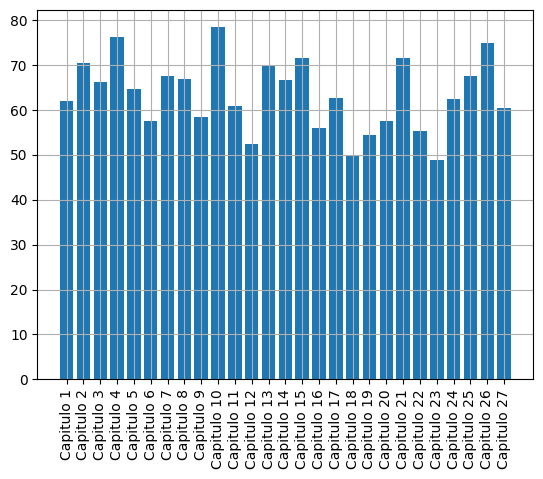

In [34]:
#Grafica de la perplejidad capitulo a cap
plt.figure()
etiqueta = ['Capitulo ' + str(i+1) for i in range(len(perplexity))]
plt.bar(etiqueta, perplexity)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [69]:
#Seleccionamos un patron de separacion para las frases, despues eliminamos esos caracteres para que las frases queden limpias

patron_separacion = r'(?<=[.,;:¿?¡!-"])\s+' #En el patron se seleccionan perguntas, excalamaciones y guiones de interlocusiones.
texto_1=textos.copy()
perplexity = []
for i in range(len(texto_1)):
  capitulos_raw=texto_1.copy()
  evaluar=capitulos_raw.pop(i)
  base_frases=' '.join(capitulos_raw)
  frases = re.split(patron_separacion, base_frases.lower())
  frases_terminadas = []
  for frase in frases:
    frase_sin_puntuacion = quitar_puntuacion(frase)
    if frase_sin_puntuacion.strip():
      frases_terminadas.append(frase_sin_puntuacion)
  #secuencias_frases = ['<s>' + frase.strip() + '</s>' for frase in frases_terminadas]
  secuencias_frases = frases_terminadas
  # Tokenizar y procesar cada frase
  all_trigrams = []
  for sentence in secuencias_frases:
    # Tokenizar la frase en palabras
    tokens = word_tokenize(sentence)
    # Calcular los unigramas, bigramas y trigramas de la frase
    trigrams = list(ngrams(tokens, n3))
    # Agregar los n-gramas de la frase a las listas globales
    all_trigrams.extend(trigrams)

  #Midamos la perpejidad
  train, vocabulary=nltk.lm.preprocessing.padded_everygram_pipeline(2,evaluar)
  # Se define el modelo utilizando un suavizado de Laplace
  lm = nltk.lm.Laplace(2)
  lm.fit(train,vocabulary)
  perplejidad = round(lm.perplexity(all_trigrams),3)
  perplexity.append(perplejidad)

#print(perplexity)

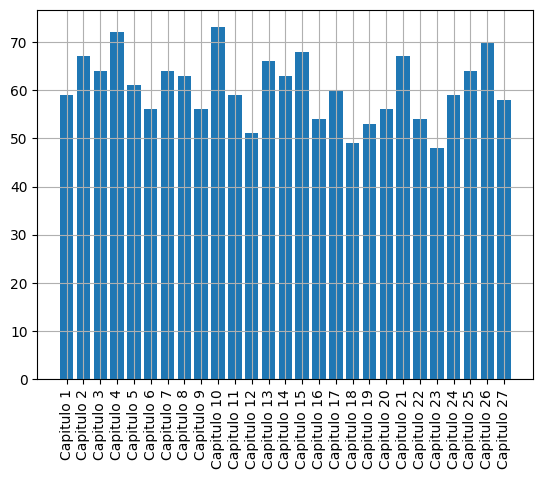

In [36]:
#Grafica de la perplejidad capitulo a cap
plt.figure()
etiqueta = ['Capitulo ' + str(i+1) for i in range(len(perplexity))]
plt.bar(etiqueta, perplexity)
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Comentario**

La perplejidad es una medida utilizada para evaluar la capacidad de un modelo de lenguaje para predecir palabras o secuencias de palabras en un corpus. Una perplejidad más baja indica un mejor rendimiento del modelo. Sin embargo, en este caso, no se observó esta mejora en los resultados.

Al dividir el texto del libro "El Principito" por capítulos y evaluar el modelo de bigramas, se encontró que solo los capítulos 12, 18 y 24 obtuvieron buenos resultados en términos de perplejidad. Esto indica que el modelo de bigramas solo pudo predecir adecuadamente esos capítulos específicos. Se realizó la misma evaluación utilizando trigramas y se obtuvo un resultado similar. Esto tiene sentido, ya que los n-gramas se limitan a las frases y descartan combinaciones que no existen.

Estos resultaods podría explicarse por las diferencias sustanciales que existen entre los capítulos del libro, ya que "El Principito" aborda distintos enfoques en cada uno de ellos.

la evaluacion del corpues fue la siguiente:

Del corpus se eliminaba el primer capitulo, se sacaban todos lo bigramas y se evaluaba el modelo, despues el segundo y asi sucesivamente.





### Punto 10
Implemente un modulo de correccion ortografica para su sistema. Puede utilizar sistemas ya diseñados como pyspellchecker (https://pypi.org/project/pyspellchecker/) o adaptar la funcion de distancia de edicion minima. El sistema puede requerir interaccion con el usuario si asi lo desea, o
diseñar un modulo de decision sobre la sustitucion (por ejemplo, sustituir siempre por la palabra mas probable).

In [37]:
 #Usando pyspellchecker de la forma mas simple

def corregir_ortografia(frase):
    spell = SpellChecker(language='es')

    palabras = frase.split()
    correccion_frase = []

    for palabra in palabras:
        # Comprobamos si la palabra está correctamente escrita
        if spell.correction(palabra) == palabra:
            correccion_frase.append(palabra)
        else:
            # Obtenemos las sugerencias de corrección para la palabra
            sugerencias = list(spell.candidates(palabra))
            # Elegimos la primera sugerencia de corrección como la más probable
            palabra_corregida = random.choice(sugerencias)

            correccion_frase.append(palabra_corregida)

    return ' '.join(correccion_frase)


In [38]:
frase_entrada = "Hloa cómo estsá me gusttaria ir a el cinu"
frase_corregida = corregir_ortografia(frase_entrada)
print(f"Frase original: {frase_entrada}")
print(f"Frase corregida: {frase_corregida}")

Frase original: Hloa cómo estsá me gusttaria ir a el cinu
Frase corregida: hola cómo ests me gustaria ir a el cinc


#### Punto 10.1
Solucion con diccionario

In [39]:
 #Usando pyspellchecker con diccionario
def corregir_ortografia(frase):
    spell = SpellChecker(language='es')
    diccionario = []

    # Leer el archivo de texto del diccionario de la RAE
    with open('diccionario.txt', 'r', encoding='utf-8') as file:
        diccionario = file.read().splitlines()

    palabras = frase.split()
    correccion_frase = []

    for palabra in palabras:
        # Comprobamos si la palabra está correctamente escrita
        if spell.correction(palabra) == palabra:
            correccion_frase.append(palabra)
        else:
            # Obtenemos las sugerencias de corrección para la palabra
            sugerencias = list(spell.candidates(palabra))

            # Buscar coincidencias entre los candidatos y el diccionario de la RAE
            coincidencias = [candidato for candidato in sugerencias if candidato in diccionario]

            if len(coincidencias) ==1:
              palabra_corregida = coincidencias[0]

            elif len(coincidencias)>1:
                # Seleccionar aleatoriamente una coincidencia como la sugerencia de corrección
                palabra_corregida = random.choice(coincidencias)
            else:
                # Si no hay coincidencias, elegir la primera sugerencia de corrección como antes
                palabra_corregida = str(random.choice(sugerencias))

            correccion_frase.append(palabra_corregida)

    return ' '.join(correccion_frase)

In [40]:
frase_entrada = "Hloa cómo estsá me gusttaria inbitarto a el cini"
frase_corregida = corregir_ortografia(frase_entrada)
print(f"Frase original: {frase_entrada}")
print(f"Frase corregida: {frase_corregida}")

Frase original: Hloa cómo estsá me gusttaria inbitarto a el cini
Frase corregida: hola cómo estás me gustaria invitarte a el mini


**Comentario**

La solución implementada para el corrector ortográfico no solo corrige palabras, sino también frases. Se realizaron dos implementaciones, siendo la segunda más completa y elaborada.

La primera implementación utiliza el módulo "pyspellchecker" en español. Este enfoque evalúa palabra por palabra y, si una palabra está mal escrita, busca candidatos proporcionados por el módulo. Luego selecciona uno al azar como corrección. Sin embargo, este enfoque puede ser considerado menos sistemático y un tanto arcaico.

La segunda implementación, en cambio, realiza una revisión más completa. Primero verifica si la palabra está bien escrita. En caso de que no lo esté, busca candidatos y los compara uno a uno con el diccionario de la Real Academia Española. Si solo hay una coincidencia entre los candidatos y el diccionario, selecciona esa opción como corrección. Si hay varias coincidencias, elige uno al azar. En caso de que no haya ninguna coincidencia, selecciona un candidato sugerido al azar.

Este enfoque sugiere una elaboración más organizada y completa. Sin embargo, si se desea que el corrector ortográfico sea aún más preciso y robusto, podría considerarse una revisión a nivel de letras para encontrar similitudes más cercanas y así proporcionar candidatos más adecuados a la palabra errónea, ademas agregar una probabilidad del uso de la palabra en el idioma lo cual pesa a la hora de corregir y cambiar una palabra.

### Punto 11

Genere un listado de los index-terms de sus textos (puede emplear el mismo vocabulario que determino en el paso 5). A partir de este listado represente todos los documentos de su corpus en el modelo de espacio vectorial.

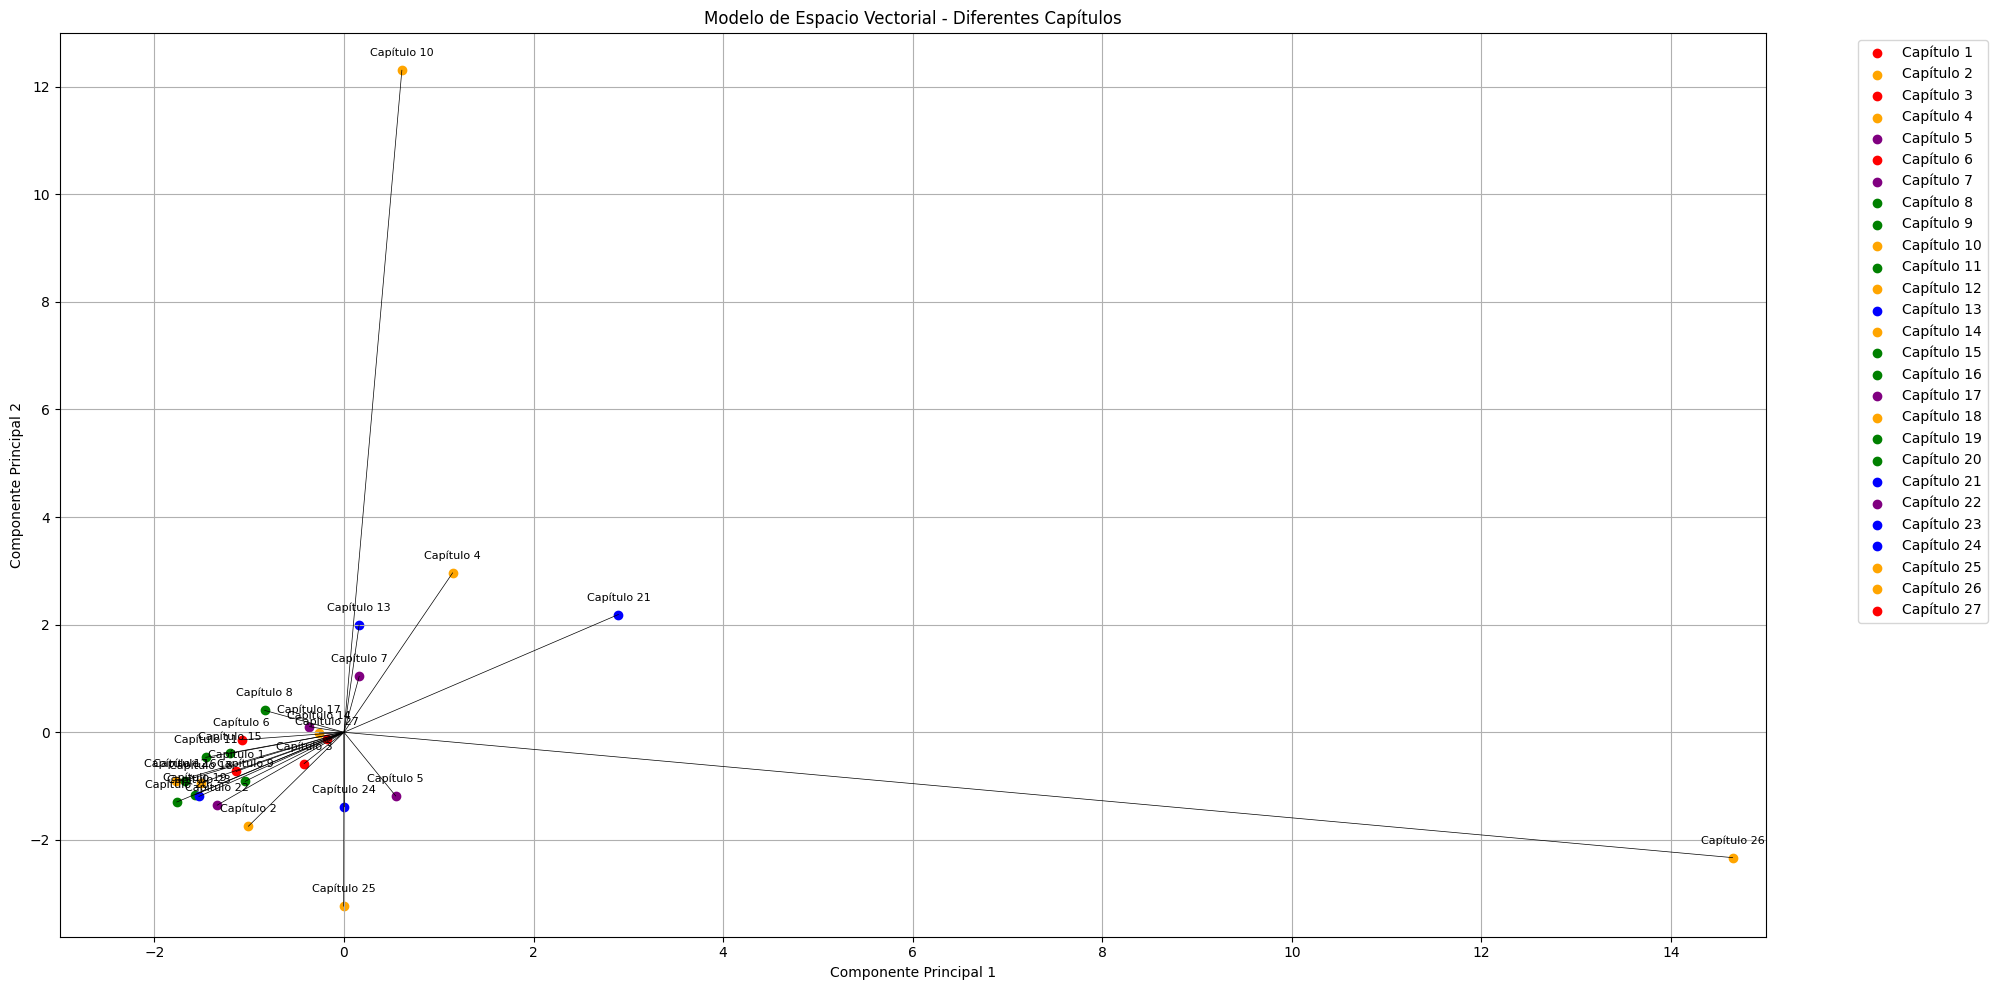

In [54]:
#Creamos una lista para guardar los distintos capitulos.
contenidos = []
# Ruta de la carpeta que contiene los archivos de texto
carpeta = '/content/capitulos'
# Obtener la lista de archivos de texto en la carpeta
for i in range(1,28):
  archivos = glob.glob(carpeta + f'/capitulo_{i}.txt')
  for archivo in archivos:
    with open(archivo, 'r') as f:
      contenido = f.read()
      contenidos.append(contenido)

# Construir el vocabulario global
textos=contenidos
# Construir el vocabulario index-terms utilizando el vocabulario antes abtenido sin stopwords
vocabulario_base=vocabulario

# Representación One-Hot Encoding
one_hot = []
for texto in textos:
    vector_texto = []
    palabras = texto.split()
    for palabra in vocabulario_base:
        vector_texto.append(int(palabra in palabras))
    one_hot.append(vector_texto)

one_hot = np.array(one_hot)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
coordenadas = pca.fit_transform(one_hot)


# Graficar los textos y líneas desde el origen
plt.figure(figsize=(20, 10))
for i, texto in enumerate(textos):
    x, y = coordenadas[i]
    #Lista de colores para graficar
    color = random.choice(['blue', 'green', 'red', 'orange', 'purple'])
    plt.scatter(x, y, color=color, label=f"Capítulo {i+1}")
    plt.annotate(f"Capítulo {i+1}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

    # Dibujar línea desde el origen
    plt.plot([0, x], [0, y], color='black',linewidth=0.5)

plt.xlim(-3,15)
plt.ylim(-3.8,13)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Modelo de Espacio Vectorial - Diferentes Capítulos')
plt.grid(True)

# Ajustar leyendas
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

**Comentario**

En el modelo de espacio vectorial, cada texto se representa como un vector en un espacio multidimensional, donde cada dimensión corresponde a una palabra del vocabulario. La representación vectorial se basa en medidas como la frecuencia de las palabras en el texto o su importancia relativa. Al analizar los resultados en la gráfica por capítulo, que tiene en cuenta el vocabulario generado en los pasos anteriores, se observa que hay dos capítulos que se destacan y se alejan considerablemente del resto. Estos capítulos son el 10, "lugar de seres extraños", y el 26, que cuenta la historia del piloto. Esto nos proporciona una comprensión de que la mayoría de los capítulos que se encuentran en el lado izquierdo de la gráfica son muy similares, lo cual tiene sentido, ya que provienen del mismo libro.

### Punto 12
Calcule el grado de similitud entre todos los documentos de su corpus empleando la medida de la distancia coseno (o medida de similitud coseno).


In [43]:
vectorizador = TfidfVectorizer()
vectores = vectorizador.fit_transform(textos)
similitud = cosine_similarity(vectores)
#print(similitud)

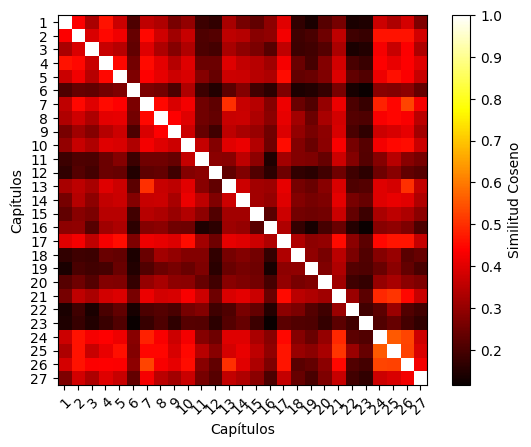

In [44]:
# Configuración del gráfico
fig, ax = plt.subplots()
im = ax.imshow(similitud, cmap='hot', interpolation='nearest')
# Agregar leyendas de color
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('Similitud Coseno')
# Mostrar números de los capítulos en el eje x e y
num_capitulos = len(textos)
ax.set_xlabel('Capítulos')
ax.set_ylabel('Capítulos')
ax.set_xticks(np.arange(num_capitulos))
ax.set_yticks(np.arange(num_capitulos))
ax.set_xticklabels(np.arange(1, num_capitulos + 1))
ax.set_yticklabels(np.arange(1, num_capitulos + 1))
# Rotar etiquetas del eje x para mayor legibilidad
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Mostrar el gráfico
plt.show()

**Comentario**

La medida de distancia coseno es ampliamente utilizada para calcular la similitud entre vectores, en este caso, los vectores representan los capítulos del libro "El pricnipito". Se calcula la similitud comparando el ángulo entre los vectores utilizando la fórmula del coseno. Al aplicar esta medida a los capítulos del libro, podemos observar que los capítulos 22 y 23 no están tan cercanos al resto de los capítulos. Sin embargo, existe una fuerte relación entre los capítulos 24 y 25.

Algunos parentescos destacados son:

* Los capítulos 1, 2, 3, 4 y 5 tienen similitudes entre sí.
* Los capítulos 1, 2, 3, 4, 5 tienen similitudes con los capítulos 24,
 25, 26 y 27.
* Los capítulos 7, 8, 9 y 10 tienen similitudes con los capítulos 24, 25, 26 y 27.

Estos hallazgos revelan patrones interesantes en la estructura y contenido del libro, resaltando las relaciones entre capitulos y similitudes entre ciertos grupos de capítulos. La medida de distancia coseno nos brinda una herramienta útil para evaluar y comprender la organización textual del libro.

### Punto 13

Lleve su corpus a un espacio LSA. Conserve un numero reducido de dimensiones.

In [74]:
#Creemos una funcion que haga el preprocesamiento, para cada capitulo.
def preprocesamiento(documento):
    # Eliminación de signos de puntuación
    documento = documento.translate(str.maketrans("", "", string.punctuation))

    # Tokenización de palabras
    tokens = word_tokenize(documento.lower())

    # Eliminación de stopwords
    stop_words = set(stopwords.words('spanish'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Stemming de palabras
    stemmer = SnowballStemmer('spanish')
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # Reconstrucción del documento preprocesado
    documento_preprocesado = ' '.join(stemmed_tokens)
    return documento_preprocesado

vectorizer = TfidfVectorizer()
corpus_prep = [preprocesamiento(texto) for texto in textos]
tfidf_matrix = vectorizer.fit_transform(corpus_prep)

lsa = TruncatedSVD(n_components=6)
lsa.fit(tfidf_matrix)
term_latent_matrix = lsa.transform(tfidf_matrix)
term_latent_matrix = term_latent_matrix.astype(float)
#print(term_latent_matrix)

[[ 0.28809693  0.50673803  0.06214753  0.06774621  0.36190103 -0.14027541]
 [ 0.39086406  0.4806286  -0.10362159  0.10650193  0.16403253 -0.06641938]
 [ 0.42089566  0.17673162 -0.07740736  0.06083787 -0.09838866  0.20493528]
 [ 0.41579191  0.32862011  0.04798209 -0.07883383  0.30252637  0.03971874]
 [ 0.41006251  0.27342349 -0.03926502 -0.1004621   0.23013666 -0.01604821]
 [ 0.32262203 -0.08574502  0.18212777  0.00646407  0.10467776 -0.19203874]
 [ 0.51173631  0.13537281 -0.0612207  -0.34345966 -0.34238838  0.16016498]
 [ 0.46478343 -0.13804424 -0.18525449 -0.3742907   0.08557958  0.06850325]
 [ 0.37468008 -0.15291291 -0.15143953 -0.37163183 -0.08208551 -0.20428836]
 [ 0.38772158 -0.08808713  0.30182609  0.08740179 -0.04194381 -0.14106541]
 [ 0.30954449 -0.15655536  0.21247319  0.12030977  0.24107929  0.3277766 ]
 [ 0.21672097 -0.0245745   0.02830888  0.18903728  0.05301127  0.74909987]
 [ 0.47515863 -0.00713785  0.27724336 -0.18975747 -0.35885719  0.02533819]
 [ 0.41612578 -0.17702016

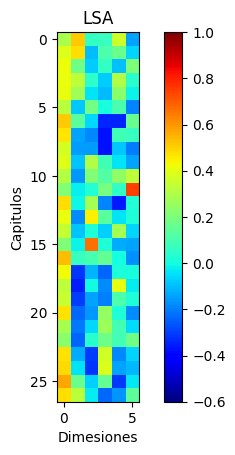

In [79]:
# Graficar la matriz
plt.imshow(term_latent_matrix, cmap='jet', vmin=-0.6, vmax=1)
plt.colorbar()  # Mostrar barra de color para referencia de valores
plt.title('LSA')
plt.xlabel('Dimesiones')
plt.ylabel('Capitulos')
plt.show()

**Comentario**

LSA (Latent Semantic Analysis) consiste en convertir un corpus de texto en un espacio vectorial de dimensionalidad reducida. Se basa en la idea de que las palabras que tienen un uso similar en diferentes contextos tienden a tener un significado similar. El objetivo de LSA es capturar la "semántica latente" de los términos y documentos en un corpus, es decir, su significado subyacente.

La reducción de dimensiones en LSA se realiza para mitigar el problema de la dimensionalidad en conjuntos de datos de texto, donde el número de características (términos) es generalmente muy alto. En este caso, se busca obtener un mejor resultado al analizar los 27 capítulos del libro. Al mantener pocas dimensiones, se logra una representación más compacta y eficiente del corpus.

Es notable cómo los capítulos 11 y 15 tienen un aporte semántico destacado en el texto, especialmente en la dimensión 2 y la dimensión 5, es ahi donde se puede resaltar y evaluar que exite una semantica latente.

### Punto 14
Implemente un clasificador no supervisado (p.ej.: k-means) que agrupe sus documentos en este espacio de representacion LSA.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


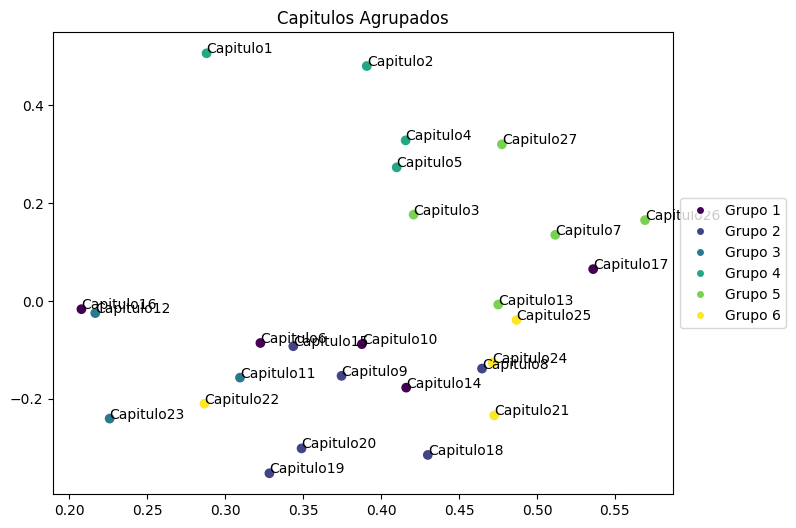

In [81]:
# Número de clusters deseado
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(term_latent_matrix)
cluster_labels = kmeans.labels_
names = []
for i in range(1, 28):
    names.append(f"Capitulo{i}")
plt.figure(figsize=(8, 6))
scatter = plt.scatter(term_latent_matrix[:, 0], term_latent_matrix[:, 1], c=cluster_labels)
for i, label in enumerate(names):
    plt.annotate(label, (term_latent_matrix[i, 0], term_latent_matrix[i, 1]))  # Agrega las etiquetas a cada punto
plt.title("Capitulos Agrupados")
# Obtener los colores de los grupos
legend_elements = []
for cluster in range(k):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Grupo {cluster+1}', markerfacecolor=scatter.to_rgba(cluster)))
# Agregar la leyenda
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Comentario**

K-means es un algoritmo de clasificación no supervisada que se utiliza en combinación con LSA (Latent Semantic Analysis) para agrupar documentos o textos en clústeres. El objetivo del algoritmo es encontrar k centroides que representen los grupos de documentos de manera óptima.

En este caso, se le pide al algoritmo que agrupe los 27 capítulos en 6 clústeres. El algoritmo calcula los centroides y las distancias entre los documentos y los centroides, y al finalizar, entrega la agrupación que considera más adecuada.

Se puede observar cómo los primeros 5 capítulos son agrupados juntos, pero el capítulo 3 es agrupado en otro subgrupo. Esto puede estar relacionado con la distancia y la ubicación de los centroides, que lo hacen más cercano a otro grupo.

La utilización del algoritmo K-means en combinación con LSA permite explorar y descubrir patrones o relaciones semánticas en los textos, agrupándolos en clústeres que comparten características similares. Esto facilita el análisis y la comprensión del corpus de texto en estudio.

### Punto 15

Implemente un MDS (Multidimensional scaling) en su corpus original y compare los resultados con los obtenidos en el item anterior.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


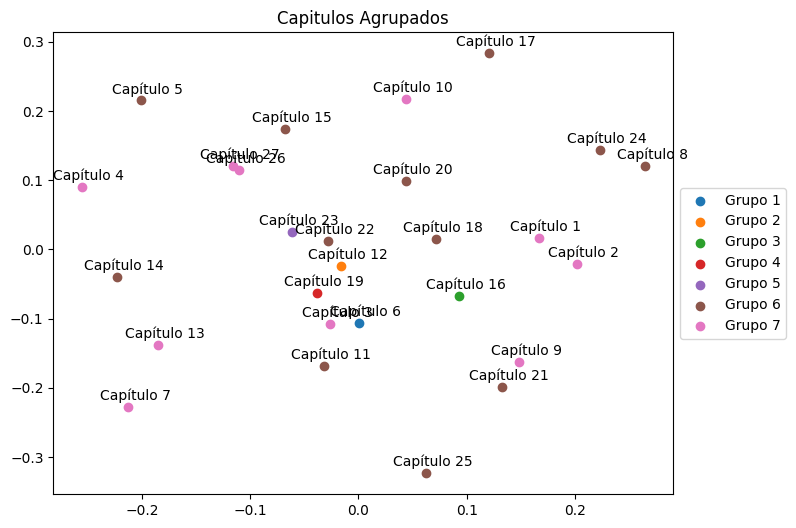

In [48]:
# Paso 1: Vectorización de los documentos utilizando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(textos)

# Paso 2: Aplicación del algoritmo Affinity Propagation para obtener los centroides
clustering = AffinityPropagation().fit(X.toarray())

# Paso 3: Cálculo de la matriz de similitud
similarity_matrix = -np.array(X.toarray() @ X.toarray().T)

# Paso 4: Reducción de dimensionalidad utilizando MDS
mds = MDS(n_components=2, dissimilarity="precomputed")
X_mds = mds.fit_transform(similarity_matrix)

# Paso 5: Visualización de los grupos en una gráfica
labels = clustering.labels_
plt.figure(figsize=(8, 6))
colors = plt.cm.tab10.colors  # Utilizar una paleta de colores predefinida
for i, label in enumerate(set(labels)):
    indices = [j for j, x in enumerate(labels) if x == label]
    plt.scatter(X_mds[indices, 0], X_mds[indices, 1], color=colors[i % len(colors)], label=f'Grupo {label+1}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Ajustar la leyenda a la derecha
# Etiquetas de los puntos
for i, txt in enumerate(textos):
    plt.annotate(f'Capítulo {i+1}', (X_mds[i, 0], X_mds[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center')

plt.title("Capitulos Agrupados")
plt.show()


#### Forzar a solo 6 grupos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


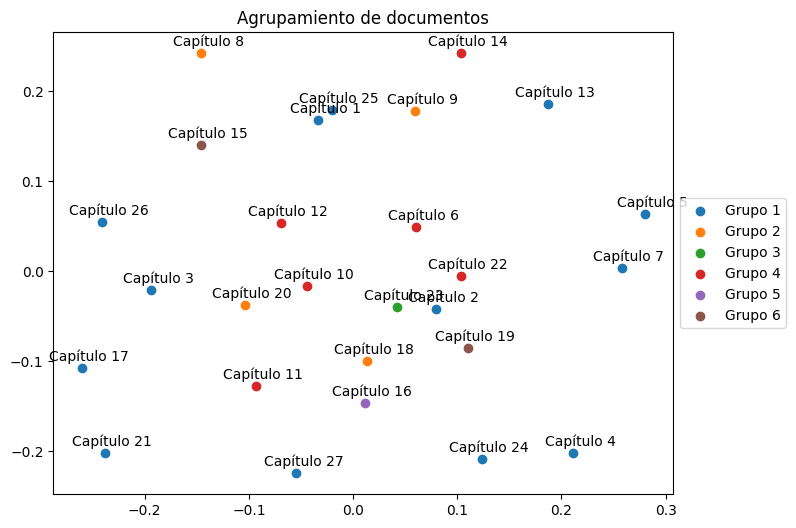

In [49]:
# Paso 1: Vectorización de los documentos utilizando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(textos)

# Paso 2: Aplicación del algoritmo K-means para obtener los centroides
k = 6  # Número de grupos deseado
clustering = KMeans(n_clusters=k).fit(X.toarray())

# Paso 3: Cálculo de la matriz de similitud
similarity_matrix = -np.array(X.toarray() @ X.toarray().T)

# Paso 4: Reducción de dimensionalidad utilizando MDS
mds = MDS(n_components=2, dissimilarity="precomputed")
X_mds = mds.fit_transform(similarity_matrix)

# Paso 5: Visualización de los grupos en una gráfica
labels = clustering.labels_
plt.figure(figsize=(8, 6))
colors = plt.cm.tab10.colors  # Utilizar una paleta de colores predefinida
for i, label in enumerate(set(labels)):
    indices = [j for j, x in enumerate(labels) if x == label]
    plt.scatter(X_mds[indices, 0], X_mds[indices, 1], color=colors[i % len(colors)], label=f'Grupo {label+1}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Ajustar la leyenda a la derecha
# Etiquetas de los puntos
for i, txt in enumerate(textos):
    plt.annotate(f'Capítulo {i+1}', (X_mds[i, 0], X_mds[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center')

plt.title("Agrupamiento de documentos")
plt.show()

####Comentario

La agrupación por MDS (Multidimensional Scaling) busca representar las relaciones de similitud o distancia entre los elementos en un espacio de menor dimensión, generalmente bidimensional o tridimensional, con el fin de facilitar su interpretación y visualización. En este caso, se utiliza la vectorización de los documentos utilizando TF-IDF.

Al realizar la comparación sin forzar las agrupaciones, este método genera 7 grupos distintos, uno más que el número exigido anteriormente. Sin embargo, se mantiene una tendencia similar. En este caso, el capítulo 3 se agrupa con los primeros cuatro capítulos, pero el capítulo 5 no tiene relevancia o pertenece a otro grupo. Resulta llamativo cómo el capítulo 19 es agrupado solo cuando en el punto anterior no formaba parte uno de los 6 grupos.

Al forzar a MDS para que entregue 6 grupos, aún persiste el problema con el capítulo 19. En este caso, se agrupa con el capítulo 15 y se crea un grupo exclusivo para ambos. Aun así, se mantiene el grupo de los primeros capítulos del texto. Esta discrepancia puede ser un punto de partida para analizar las diferencias gramaticales, semánticas o incluso temáticas entre los capítulos.